In [1]:
import os

os.chdir('../../')
print(os.getcwd())

import torch.nn as nn
import torch.nn.functional as F
from torchvision.transforms.functional import to_tensor
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import albumentations as A
import torch
from classification import detectGame

/home/robert/Documents/GitHub/OutSmarted/backend


In [2]:
tictactoeTransform = A.Compose([
    A.augmentations.geometric.transforms.Perspective(p=1, scale=(0.005, 0.02)),
    A.augmentations.transforms.OpticalDistortion(p=0.2),
    A.augmentations.geometric.transforms.ElasticTransform(p=1, alpha=1, sigma=4, alpha_affine=4),
    A.RandomCrop(160, 160, p=0.25),
    A.InvertImg(p=0.1),
    A.ColorJitter(brightness=0.55, contrast=0.6, saturation=0.6, hue=0.6, p=0.4),
    A.GaussNoise(p=0.12),
    A.Blur(blur_limit=3, p=0.22),
    A.GlassBlur(max_delta=1, iterations=1, p=0.14),
    A.CLAHE(p=0.22, tile_grid_size=(4, 4)),
    A.Sharpen(p=0.18, alpha=0.2, lightness=1.5),
    A.Emboss(p=0.18),
    A.Equalize(p=0.04),
    A.MultiplicativeNoise(p=0.22),
    A.Resize(168, 168, p=1.0, interpolation=Image.NEAREST),
    A.RandomBrightness(p=0.22),
    A.RandomContrast(p=0.22),
    A.RandomGamma(p=0.22),
    A.Solarize(threshold=128, p=0.2),
])

connectfourTransform = A.Compose([
    A.augmentations.geometric.transforms.Perspective(p=1, scale=(0.005, 0.02)),
    A.augmentations.transforms.OpticalDistortion(p=0.2),
    A.augmentations.transforms.OpticalDistortion(p=0.2),
    A.augmentations.geometric.transforms.ElasticTransform(p=0.2, alpha=1, sigma=0.5, alpha_affine=0.5),
    A.RandomCrop(154, 154, p=0.25),
    A.HorizontalFlip(p=0.5),
    A.ColorJitter(brightness=0.55, contrast=0.6, saturation=0.6, hue=0.6, p=0.4),
    A.GaussNoise(p=0.12),
    A.Blur(blur_limit=3, p=0.22),
    A.GlassBlur(max_delta=1, iterations=1, p=0.14),
    A.CLAHE(p=0.22, tile_grid_size=(4, 4)),
    A.Sharpen(p=0.18, alpha=0.2, lightness=1.5),
    A.Emboss(p=0.18),
    A.Equalize(p=0.04),
    A.MultiplicativeNoise(p=0.22),
    A.Resize(168, 168, p=1.0, interpolation=Image.NEAREST),
    A.RandomBrightness(p=0.22),
    A.RandomContrast(p=0.22),
    A.RandomGamma(p=0.22),
    A.Solarize(threshold=128, p=0.2),
])

/tmp/ipykernel_5179/3924399659.py:16: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  A.Resize(168, 168, p=1.0, interpolation=Image.NEAREST),
/home/robert/anaconda3/envs/myenv/lib/python3.8/site-packages/albumentations/augmentations/transforms.py:1613: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(
/home/robert/anaconda3/envs/myenv/lib/python3.8/site-packages/albumentations/augmentations/transforms.py:1639: FutureWarning: RandomContrast has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(
/tmp/ipykernel_5179/3924399659.py:39: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  A.Resize(168, 168, p=1.0, interpolation=Image.NEAREST),


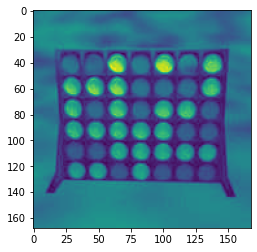

In [3]:
# imgPath = '../data/TicTacToe/boards/raw/77.jpg'
imgPath = '../data/ConnectFour/boards/1.jpg'
# imgPath = '1.jpg'
img = Image.open(imgPath)
img = img.resize((168, 168))
img = img.convert('L')
plt.imshow(img)


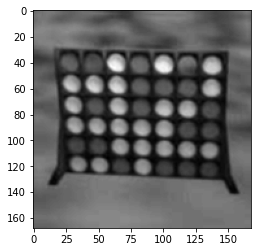

In [4]:

img2 = np.array(img)
img2 = tictactoeTransform(image=img2)['image']
plt.imshow(img2, cmap='gray')
img2 = Image.fromarray(img2)
img2.save('test.jpg')

In [6]:
game, vals = detectGame(img2, round_vals=False)
print(f"Tictactoe: {vals[0]}%, ConnectFour: {vals[1]}%")

Tictactoe: 1.0859062967938371e-05%, ConnectFour: 0.9999891519546509%
